## Fitzhugh-Nagumo Model

Fitzhugh (1961) and Nagumo et al (1962) independently proposed a much simpler model of action potential generation than in the Hodgkin-Huxley (HH) model. Rather than four nonlinear differential equations, they suggested that two differential equations (one with a cubic nonlinearity, the other linear) gave qualitative dynamics similar to the HH model:
$$
u' = u - \frac{1}{3}u^3 - w + I
$$
$$
w' = \epsilon (b_0 + b_1u - w).
$$
Note, there are several mild variations on the Fitzhugh-Nagumo (FN) model in Gerstner et al (2014) and other books. This model produces sharp pulse-like oscillations like action potentials, which mimic that of Hodgkin-Huxley. The advantage is that this model can be understood using phase plane analysis.

The dynamics of this model depends upon the chosen parameters, as can be shown by examing the phase plane in two different parameter regimes. We can make phase portraits in a straightforward way by simply computing the direction vectors and plotting them across a mesh of grid points for reasonable values of $u$ and $w$.

To start, as always, we will import *numpy* and *matplotlib*.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Then define model parameters and a function, which returns the right hand side of the FN system:

In [37]:
b0 = 0.9
b1 = 1.0
I = 0
ep = 0.1

def F(Y,t):
    u, w = Y
    return [u-u**3/3-w+I, ep*(b0+b1*u-w)]

Next, define a mesh of values we will plug in to determine the direction field of our phase portrait.

In [38]:
u = np.linspace(-3,3,20)
w = np.linspace(-3,3,20)

U, W = np.meshgrid(u,w)

x, y = np.zeros(U.shape), np.zeros(W.shape)

ni, nj = U.shape

And now loop through these different values and compute the slope of the direction arrows, and plot.

In [39]:
for i in range(ni):
    for j in range(nj):
        yprime = F([U[i,j],W[i,j]],0)
        x[i,j] = yprime[0]
        y[i,j] = yprime[1]   

Now compute the nullclines to overlay on the direction field.

(-3, 3)

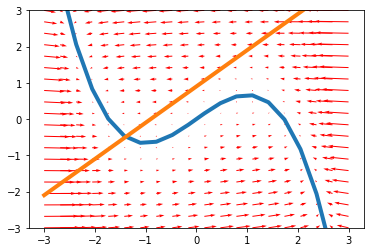

In [40]:
unull = u-u**3/3+I
wnull = b0+b1*u

fig = plt.figure()
plt.plot(u,unull,linewidth=4.0)
plt.plot(w,wnull,linewidth=4.0)
Q = plt.quiver(U,W,x,y,color='r')
plt.ylim([-3, 3])

We see there can be at most one stationary equilibrium in this case. How is it approached? Let's study this by simply simulating the ODEs starting at a given initial condition $u=w=0$.

(-3, 3)

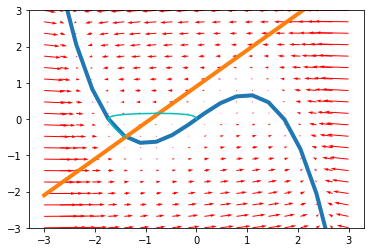

In [41]:
from scipy.integrate import odeint

tvec = np.linspace(0,50,200)
ys = odeint(F,[0,0],tvec)
fig = plt.figure()
plt.plot(u,unull,linewidth=4.0)
plt.plot(w,wnull,linewidth=4.0)
Q = plt.quiver(U,W,x,y,color='r')
plt.plot(ys[:,0],ys[:,1],'c-')
plt.ylim([-3, 3])

So note that the cyan line spirals into the fixed point. Let's look at another case, where $I=1$. In this case, if we consider $u(0) = -3$ and $w(0) = -0.5$, we find...

(-3, 3)

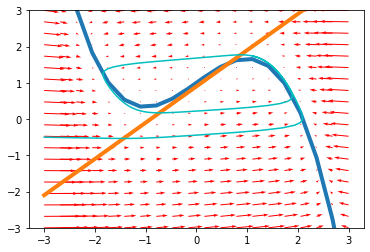

In [43]:
I = 1

def F(Y,t):
    u, w = Y
    return [u-u**3/3-w+I, ep*(b0+b1*u-w)]

for i in range(ni):
    for j in range(nj):
        yprime = F([U[i,j],W[i,j]],0)
        x[i,j] = yprime[0]
        y[i,j] = yprime[1] 

unull = u-u**3/3+I
wnull = b0+b1*u

ys = odeint(F,[-3,-0.5],tvec)
fig = plt.figure()
plt.plot(u,unull,linewidth=4.0)
plt.plot(w,wnull,linewidth=4.0)
Q = plt.quiver(U,W,x,y,color='r')
plt.plot(ys[:,0],ys[:,1],'c-')
plt.ylim([-3, 3])

so we see limit cycles (oscillations) emerge, where the trajectory rotates indefinitely around the fixed point in the center.